In [1]:
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.neural_network import MLPClassifier
%matplotlib inline

from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# def fetch_mnist(data_home=None):
#     mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
#     data_home = get_data_home(data_home=data_home)
#     data_home = os.path.join(data_home, 'mldata')
#     if not os.path.exists(data_home):
#         os.makedirs(data_home)
#     mnist_save_path = os.path.join(data_home, "mnist-original.mat")
#     if not os.path.exists(mnist_save_path):
#         mnist_url = urllib.request.urlopen(mnist_alternative_url)
#         with open(mnist_save_path, "wb") as matlab_file:
#             copyfileobj(mnist_url, matlab_file)

In [4]:
# fetch_mnist()

In [6]:
from sklearn.datasets import fetch_mldata

In [7]:
mnist = fetch_mldata('MNIST original')

In [8]:
X, Y = mnist["data"], mnist["target"]

In [9]:
X.shape,Y.shape

((70000, 784), (70000,))

In [10]:
# X = X.reshape(X.shape[0],-1)

In [11]:
X=X/255

In [31]:
np.unique(Y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [33]:
n_classes = len(np.unique(Y))
n_classes

10

In [13]:
#as we only have 2 classes
# Y = np.where(Y==7,0,1)

In [16]:
digits = 10
examples = Y.shape[0]

Y = Y.reshape(1, examples)

Y_new = np.eye(digits)[Y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [17]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [18]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((784, 60000), (784, 10000), (10, 60000), (10, 10000))

In [19]:
def relu(z,derative = False):
    if derative:
        z[z<=0]=0
        z[z>0]=1
        return z
    z[z<0]=0
    return z

In [21]:
def sigmoid(z,derative = False):
    if derative:
#         print("===================input to sigmoid derv====================")
#         print(z)
#         print("================output of sig derv=============")
        temp = sigmoid(z)*(1-sigmoid(z))
#         print(temp)
#         return z*(1-z)
        return temp
    return 1.0/(1.0+np.exp(-z))

In [22]:
def softmax(z):
    z=z-np.max(z,axis=0)
    return np.exp(z)/np.sum(np.exp(z),axis=0)

In [23]:
def compute_multiclass_loss(Y, Y_hat):
#     print("&&&&&&&&&&&&&INSIDe cost function%%%%%%%%%%")
#     print("===========true labels===================")
#     print(Y)
#     print("===========predic labels===================")
#     print(Y_hat)
#     print("========fixing predicted loss=========")
    Y_hat[Y_hat==0.] = 0.0001
    Y_hat[Y_hat==1.] = 0.9999
#     print(Y_hat)
#     print("============log of lablesl=============")
#     print(np.log(Y_hat))
#     print("=================multiple=============")
#     print(np.multiply(Y, np.log(Y_hat)))
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    return -(1/m) * L_sum

In [24]:
def get_class_values(results):
    return results.argmax(axis=0)

In [25]:
def init_weights(n_hidden_layers, number_of_neurons):
    weights_layers =[np.random.uniform(size=(number_of_neurons[0],X_train.shape[0]))]
    bias_layers = [np.random.uniform(size=(number_of_neurons[0],1))]
    
    for i in range(1,n_hidden_layers):
        weights_layers.append(np.random.uniform(size=(number_of_neurons[i],weights_layers[i-1].shape[0])))
        bias_layers.append(np.random.uniform(size=(number_of_neurons[i],1)))
    
    weights_layers.append(np.random.uniform(size=(n_classes,weights_layers[-1].shape[0])))
    bias_layers.append(np.random.uniform(size=(n_classes,1)))
    
    return weights_layers,bias_layers

In [26]:
def train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation):
    global weight_layers
    global bias_layers
    
    cost=[]
    number_of_samples = X_train.shape[1]
    accuracy_train = []
    accuracy_test = []
    
    #------epoch start here----------
    while epoch>0:
        print(epoch)
#         print("################EPOCH start here ############")
        input_layers = [X_train]
        output_layers=[X_train]

        delta_weights = []
        delta_bias = []
        


        for weight,bias in zip(weight_layers[:-1],bias_layers[:-1]):
#             print("%%%%%%%%%%%%%Hidden layer%%%%%%%%%%%%%%")
#             print("=========A in W.A+B=============")
#             print(output_layers[-1])
#             print("=========W in W.A+B=============")
#             print(weight)
#             print("=========B in W.A+B=============")
#             print(bias)
            input_layers.append(np.dot(weight,output_layers[-1])+bias)
#             print('==============input to the layer==============')
#             print(input_layers[-1])
            output_layers.append(hidden_layer_activation(input_layers[-1]))
#             print("============output after activation===========")
#             print(output_layers[-1])

#         print('%%%%%%%%%%%%%%%%output layer%%%%%%%%%%%%%')
#         print("=========A in W.A+B=============")
#         print(output_layers[-1])
#         print("=========W in W.A+B=============")
#         print(weight_layers[-1])
#         print("=========B in W.A+B=============")
#         print(bias_layers[-1])
        input_layers.append(np.dot(weight_layers[-1],output_layers[-1])+bias_layers[-1])
#         print('==============input to the layer==============')
#         print(input_layers[-1])
        output_layers.append(softmax(input_layers[-1]))
#         print("============output after activation===========")
#         print(output_layers[-1])
        
        
        c=compute_multiclass_loss(Y_train,output_layers[-1])
        print(f"cost = {c}")
#         if np.isnan(c):
#             print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
        cost.append(c)
        

        #------Output layer error --------
        error = output_layers[-1] - Y_train
#         print("================output layer error==========")
#         print(error)
        
        
        delta_weights.append((1./number_of_samples)*np.dot(error,output_layers[-2].T))
#         print("=====delta weight output layer============")
#         print(delta_weights[0])
        
        delta_bias.append((1./number_of_samples)*np.sum(error, axis=1, keepdims=True))
#         print("=====delta bias output layer============")
#         print(delta_bias[0])
        
        #-----hidden layer stuff

        for i in range(len(input_layers)-1)[:0:-1]:
            error = np.dot(weight_layers[i].T,error)
#             print("==============error this layer========")
#             print(error)
            delta_z = error*hidden_layer_activation(input_layers[i],derative=True)
#             print("==========input layer derv==========")
#             print(hidden_layer_activation(input_layers[i],derative=True))
#             print("=======delta z===========")
#             print(delta_z)
            delta_weights.insert(0,(1./number_of_samples)*np.dot(delta_z,output_layers[i-1].T))
#             print("=====delta weight layer============")
#             print(delta_weights[0])
            delta_bias.insert(0,(1./number_of_samples)*np.sum(error,axis=1,keepdims=True))
#             print("=====delta bias layer============")
#             print(delta_bias[0])

        for i in range(len(weight_layers)):
#             delta_weights[i][np.isnan(delta_weights[i])] = 0.0
            weight_layers[i]=weight_layers[i]-learning_rate*delta_weights[i]
            bias_layers[i]=bias_layers[i]-learning_rate*delta_bias[i]
        
#         accuracy_train.append(get_performance(X_train,Y_train,verbose=False)[0])
#         accuracy_test.append(get_performance(X_test,Y_test,verbose=False)[0])
        
#         if np.isnan(c):
#             assert(False)
        epoch-=1

    return cost,accuracy_train,accuracy_test

In [27]:
def predict(X_test,hidden_layer_activation):
    global weight_layers
    global bias_layers
    

    input_layers = [X_test]
    output_layers=[X_test]

    for weight,bias in zip(weight_layers[:-1],bias_layers[:-1]):
        input_layers.append(np.dot(weight,output_layers[-1])+bias)
        output_layers.append(hidden_layer_activation(input_layers[-1]))

    input_layers.append(np.dot(weight_layers[-1],output_layers[-1])+bias_layers[-1])
    output_layers.append(softmax(input_layers[-1]))
    return get_class_values(output_layers[-1])

In [37]:
def get_performance(x,y,verbose = True):
    results = predict(x,hidden_layer_activation=hidden_layer_activation)
    y=get_class_values(y)
    acc = accuracy_score(y,results)
    cnf = confusion_matrix(y,results)
    if verbose:
        print(f"Accuracy score = {acc}")
        print(cnf)
        df_cm = pd.DataFrame(cnf, index = range(n_classes),columns = range(n_classes))
        sn.heatmap(df_cm, annot=True)
    return acc,cnf

## Part 1 (i)(a)

### i) 1 hidden layer

In [40]:
#hyperparameters
epoch = 2000
learning_rate = 1

In [41]:
# %%capture
weight_layers,bias_layers = init_weights(1,[100])
hidden_layer_activation = sigmoid
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)
# cost = train_neural_network(X_train,Y_train,epoch,learning_rate)

2000
cost = 7.659958709474577
1999
cost = 11.41582181553185
1998
cost = 16.137873890676524
1997
cost = 20.061530705800553
1996
cost = 24.854076927083376
1995
cost = 29.844658387056764
1994
cost = 23.82824988381062
1993
cost = 28.694642245535906
1992
cost = 33.55397088253929
1991
cost = 33.708531110176494
1990
cost = 35.648966328932616
1989
cost = 32.87754407087605
1988
cost = 37.35140959830986
1987
cost = 34.45301047532991
1986
cost = 37.73061050256786
1985
cost = 41.35190256209488
1984
cost = 34.34049295586661
1983
cost = 35.625944563138574
1982
cost = 38.438977933568005
1981
cost = 34.68849528093013
1980
cost = 38.703559084707855
1979
cost = 34.32043212256317
1978
cost = 37.10393872451263
1977
cost = 34.75464460507708
1976
cost = 40.27246910951079
1975
cost = 46.254614144333004
1974
cost = 48.29733902670019
1973
cost = 33.06189129803047
1972
cost = 29.20990440402552
1971
cost = 28.04583676841762
1970
cost = 32.41840408482219
1969
cost = 31.71564742473929
1968
cost = 35.50321682650162

1730
cost = 1.6790412688294585
1729
cost = 1.6425208339555313
1728
cost = 1.4887186069552785
1727
cost = 1.523246088887635
1726
cost = 1.5462434425401528
1725
cost = 1.640674664641804
1724
cost = 1.744378587388241
1723
cost = 1.8045350137357479
1722
cost = 1.5273154067641566
1721
cost = 1.5256211850888315
1720
cost = 1.5610983740135727
1719
cost = 1.737702642904214
1718
cost = 1.5385260913658125
1717
cost = 1.6033380745544354
1716
cost = 1.400337544664496
1715
cost = 1.4640760299690725
1714
cost = 1.4767537225868097
1713
cost = 1.5897904311410047
1712
cost = 1.54483253358908
1711
cost = 1.4170657542201057
1710
cost = 1.5075757652195287
1709
cost = 1.4660991582017864
1708
cost = 1.5298693247417332
1707
cost = 1.3705673796248605
1706
cost = 1.4289948682360327
1705
cost = 1.3271042808053852
1704
cost = 1.340351192382663
1703
cost = 1.4451309978193771
1702
cost = 1.4715903622766682
1701
cost = 1.3428858250761784
1700
cost = 1.376499880800601
1699
cost = 1.4015512704377298
1698
cost = 1.469

1464
cost = 0.8011528846456607
1463
cost = 0.7928674843592074
1462
cost = 0.7988401823893965
1461
cost = 0.7907410362101847
1460
cost = 0.796545379807701
1459
cost = 0.7886300481574411
1458
cost = 0.7942683818907859
1457
cost = 0.7865343149116234
1456
cost = 0.7920090863002861
1455
cost = 0.7844536442197804
1454
cost = 0.7897673839662428
1453
cost = 0.7823878552697692
1452
cost = 0.7875431597249473
1451
cost = 0.7803367772876966
1450
cost = 0.7853362929682722
1449
cost = 0.7783002482991163
1448
cost = 0.783146658283513
1447
cost = 0.7762781140302372
1446
cost = 0.7809741260697413
1445
cost = 0.7742702269306551
1444
cost = 0.7788185631223293
1443
cost = 0.7722764453038049
1442
cost = 0.7766798331815855
1441
cost = 0.7702966325350696
1440
cost = 0.7745577974445612
1439
cost = 0.7683306564102751
1438
cost = 0.7724523150411456
1437
cost = 0.7663783885191047
1436
cost = 0.7703632434766897
1435
cost = 0.7644397037389162
1434
cost = 0.7682904390438269
1433
cost = 0.7625144797946536
1432
cost 

1198
cost = 0.6085828021751661
1197
cost = 0.6081599047431288
1196
cost = 0.6077384905244513
1195
cost = 0.6073178348235168
1194
cost = 0.6068986052509948
1193
cost = 0.6064801658554166
1192
cost = 0.6060631012471873
1191
cost = 0.6056468541743456
1190
cost = 0.6052319356550134
1189
cost = 0.6048178581809314
1188
cost = 0.6044050675747026
1187
cost = 0.6039931380714473
1186
cost = 0.6035824578045454
1185
cost = 0.6031726555976061
1184
cost = 0.6027640686107364
1183
cost = 0.602356373854507
1182
cost = 0.6019498635255999
1181
cost = 0.6015442570951743
1180
cost = 0.6011398071722212
1179
cost = 0.6007362705697906
1178
cost = 0.6003338651132796
1177
cost = 0.5999323803875102
1176
cost = 0.5995320037217752
1175
cost = 0.5991325533986492
1174
cost = 0.5987341900713157
1173
cost = 0.5983367570950411
1172
cost = 0.59794039184369
1171
cost = 0.5975449595263927
1170
cost = 0.5971505772515546
1169
cost = 0.5967571292305811
1168
cost = 0.5963647149742031
1167
cost = 0.5959732351759962
1166
cost =

930
cost = 0.5240012623701328
929
cost = 0.5237629819154028
928
cost = 0.5235251125258835
927
cost = 0.5232876530240492
926
cost = 0.5230506022409047
925
cost = 0.5228139590159628
924
cost = 0.5225777221972182
923
cost = 0.5223418906411222
922
cost = 0.522106463212556
921
cost = 0.5218714387848019
920
cost = 0.5216368162395123
919
cost = 0.5214025944666812
918
cost = 0.5211687723646101
917
cost = 0.5209353488398748
916
cost = 0.5207023228072897
915
cost = 0.5204696931898722
914
cost = 0.5202374589188055
913
cost = 0.5200056189333964
912
cost = 0.5197741721810375
911
cost = 0.5195431176171643
910
cost = 0.5193124542052093
909
cost = 0.5190821809165608
908
cost = 0.5188522967305111
907
cost = 0.5186228006342137
906
cost = 0.5183936916226283
905
cost = 0.5181649686984735
904
cost = 0.5179366308721722
903
cost = 0.5177086771617971
902
cost = 0.5174811065930149
901
cost = 0.5172539181990292
900
cost = 0.5170271110205206
899
cost = 0.5168006841055872
898
cost = 0.5165746365096813
897
cost = 

659
cost = 0.4717476580084271
658
cost = 0.4715922524901326
657
cost = 0.47143706602491514
656
cost = 0.4712820980868205
655
cost = 0.4711273481516355
654
cost = 0.47097281569688504
653
cost = 0.47081850020182564
652
cost = 0.4706644011474396
651
cost = 0.470510518016432
650
cost = 0.4703568502932223
649
cost = 0.4702033974639414
648
cost = 0.47005015901642383
647
cost = 0.46989713444020387
646
cost = 0.4697443232265089
645
cost = 0.4695917248682538
644
cost = 0.4694393388600352
643
cost = 0.4692871646981253
642
cost = 0.46913520188046615
641
cost = 0.46898344990666485
640
cost = 0.4688319082779853
639
cost = 0.46868057649734457
638
cost = 0.4685294540693058
637
cost = 0.4683785405000718
636
cost = 0.4682278352974807
635
cost = 0.46807733797099865
634
cost = 0.4679270480317141
633
cost = 0.4677769649923327
632
cost = 0.46762708836717043
631
cost = 0.46747741767214884
630
cost = 0.46732795242478803
629
cost = 0.4671786921442011
628
cost = 0.46702963635108985
627
cost = 0.466880784567737

389
cost = 0.436351033448222
388
cost = 0.43624012445406024
387
cost = 0.436129337519662
386
cost = 0.4360186723865789
385
cost = 0.43590812879685326
384
cost = 0.4357977064930192
383
cost = 0.43568740521810567
382
cost = 0.43557722471563687
381
cost = 0.4354671647296345
380
cost = 0.435357225004621
379
cost = 0.4352474052856199
378
cost = 0.43513770531815893
377
cost = 0.43502812484826997
376
cost = 0.43491866362249426
375
cost = 0.43480932138788175
374
cost = 0.43470009789199365
373
cost = 0.43459099288290476
372
cost = 0.4344820061092052
371
cost = 0.43437313732000377
370
cost = 0.4342643862649264
369
cost = 0.4341557526941225
368
cost = 0.43404723635826387
367
cost = 0.4339388370085481
366
cost = 0.43383055439669943
365
cost = 0.43372238827497245
364
cost = 0.43361433839615215
363
cost = 0.4335064045135567
362
cost = 0.43339858638104
361
cost = 0.433290883752993
360
cost = 0.433183296384345
359
cost = 0.4330758240305667
358
cost = 0.4329684664476711
357
cost = 0.4328612233922161
35

119
cost = 0.4101191505896448
118
cost = 0.4100335982756702
117
cost = 0.4099481178738701
116
cost = 0.4098627092616166
115
cost = 0.4097773723166379
114
cost = 0.40969210691701496
113
cost = 0.4096069129411821
112
cost = 0.40952179026792507
111
cost = 0.4094367387763817
110
cost = 0.4093517583460401
109
cost = 0.4092668488567373
108
cost = 0.40918201018866057
107
cost = 0.409097242222344
106
cost = 0.4090125448386701
105
cost = 0.4089279179188679
104
cost = 0.4088433613445111
103
cost = 0.4087588749975195
102
cost = 0.4086744587601574
101
cost = 0.40859011251503174
100
cost = 0.40850583614509256
99
cost = 0.4084216295336325
98
cost = 0.40833749256428453
97
cost = 0.40825342512102303
96
cost = 0.40816942708816106
95
cost = 0.4080854983503516
94
cost = 0.4080016387925854
93
cost = 0.40791784830019123
92
cost = 0.40783412675883374
91
cost = 0.4077504740545143
90
cost = 0.4076668900735691
89
cost = 0.40758337470266953
88
cost = 0.4074999278288192
87
cost = 0.40741654933935695
86
cost = 0.

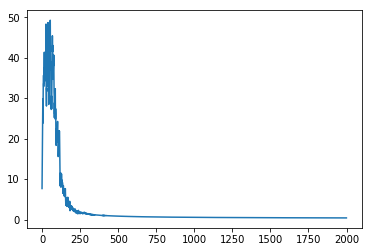

In [42]:
plt.plot(range(len(cost)),cost)

Accuracy score = 0.8784
[[ 930    0    2    9    2   18   11    3    4    1]
 [   0 1085    6   10    2    5    4    0   23    0]
 [  14   18  875   23   18    5   21   18   32    8]
 [   4   11   29  866    2   48    4   11   24   11]
 [   1    3    6    1  886    5   18    3    5   54]
 [  12   19   11   53   17  718   13    7   32   10]
 [  21    8    9    1   27   21  863    3    5    0]
 [   3   29   34    6   15    4    0  903    8   26]
 [  20   11   18   39   13   25   11   10  812   15]
 [  12    9    6   15   77    7    2   21   14  846]]


(0.8784, array([[ 930,    0,    2,    9,    2,   18,   11,    3,    4,    1],
        [   0, 1085,    6,   10,    2,    5,    4,    0,   23,    0],
        [  14,   18,  875,   23,   18,    5,   21,   18,   32,    8],
        [   4,   11,   29,  866,    2,   48,    4,   11,   24,   11],
        [   1,    3,    6,    1,  886,    5,   18,    3,    5,   54],
        [  12,   19,   11,   53,   17,  718,   13,    7,   32,   10],
        [  21,    8,    9,    1,   27,   21,  863,    3,    5,    0],
        [   3,   29,   34,    6,   15,    4,    0,  903,    8,   26],
        [  20,   11,   18,   39,   13,   25,   11,   10,  812,   15],
        [  12,    9,    6,   15,   77,    7,    2,   21,   14,  846]]))

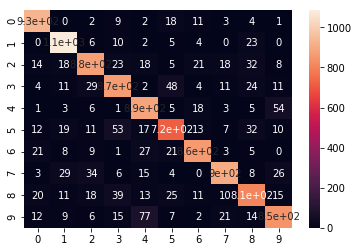

In [43]:
get_performance(X_test,Y_test)

Accuracy score = 0.8817833333333334
[[5566    7   43   31   19  120   47   23   54   13]
 [   1 6474   48   31   13   29    9   16  104   17]
 [  60  115 5100   95  120   33  129  100  171   35]
 [  29  111  156 5195   26  289   25   81  150   69]
 [  21   34   30    8 5272   19   74   16   59  309]
 [  92  150   47  230  151 4390   99   34  165   63]
 [  56   46   83    7   86   90 5492    8   47    3]
 [  24  130   75   30  102   22    2 5583   28  269]
 [  63  142  105  198   42  174   70   19 4939   99]
 [  60   45   38   86  438   50    8  255   73 4896]]


(0.8817833333333334,
 array([[5566,    7,   43,   31,   19,  120,   47,   23,   54,   13],
        [   1, 6474,   48,   31,   13,   29,    9,   16,  104,   17],
        [  60,  115, 5100,   95,  120,   33,  129,  100,  171,   35],
        [  29,  111,  156, 5195,   26,  289,   25,   81,  150,   69],
        [  21,   34,   30,    8, 5272,   19,   74,   16,   59,  309],
        [  92,  150,   47,  230,  151, 4390,   99,   34,  165,   63],
        [  56,   46,   83,    7,   86,   90, 5492,    8,   47,    3],
        [  24,  130,   75,   30,  102,   22,    2, 5583,   28,  269],
        [  63,  142,  105,  198,   42,  174,   70,   19, 4939,   99],
        [  60,   45,   38,   86,  438,   50,    8,  255,   73, 4896]]))

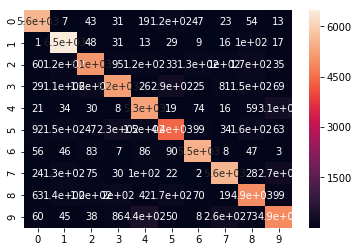

In [44]:
get_performance(X_train,Y_train)

### ii) 3 hidden layers

In [152]:
#hyperparameters
epoch = 10
learning_rate = 0.01

In [154]:
%%capture
weight_layers,bias_layers = init_weights(3,[100,50,50])
hidden_layer_activation = sigmoid
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)
# cost = train_neural_network(X_train,Y_train,epoch,learning_rate)

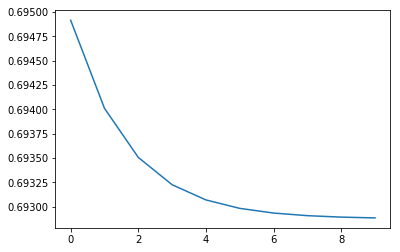

In [155]:
plt.plot(range(len(cost)),cost)

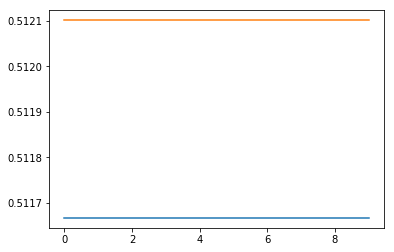

In [156]:
plt.plot(range(len(acc_train)),acc_train)
plt.plot(range(len(acc_test)),acc_test)

Accuracy score = 0.512101017186952
[[1460    0]
 [1391    0]]


(0.512101017186952, array([[1460,    0],
        [1391,    0]]))

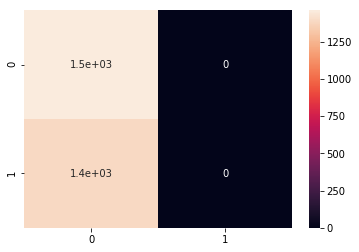

In [157]:
get_performance(X_test,Y_test)

Accuracy score = 0.5116666666666667
[[5833    0]
 [5567    0]]


(0.5116666666666667, array([[5833,    0],
        [5567,    0]]))

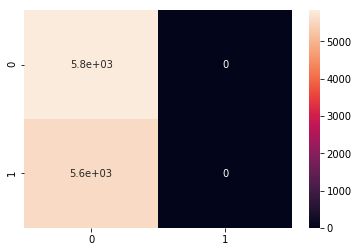

In [151]:
get_performance(X_train,Y_train)

## Part 1 (i)(b)

In current state model is underfiting (as both traning and test accuracy are very low). I think this is happening becuse we are using softmax in last layer. As in the given dataset we only have 2 classes the inital crossentropy loss is so low that the changes in weight are very small and hence barely any learning is taking place. This problem kinda solves if we use a bigger subset of MNIST with multiple classes or 1 neuron with sigmoid in final layer. 

## Part 1 (i)(c)

### i) 1 hidden layer

In [233]:
#hyperparameters
epoch = 10
learning_rate = 0.0001

In [234]:
%%capture
weight_layers,bias_layers = init_weights(1,[100])
hidden_layer_activation = relu
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)

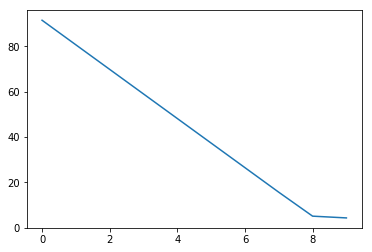

In [235]:
plt.plot(range(len(cost)),cost)

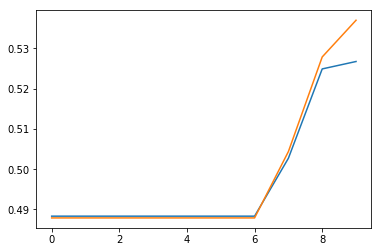

In [236]:
plt.plot(range(len(acc_train)),acc_train)
plt.plot(range(len(acc_test)),acc_test)

Accuracy score = 0.5370045598035776
[[ 381 1079]
 [ 241 1150]]


(0.5370045598035776, array([[ 381, 1079],
        [ 241, 1150]]))

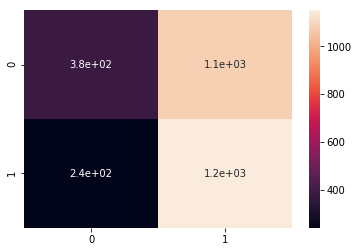

In [237]:
get_performance(X_test,Y_test)

Accuracy score = 0.5267543859649123
[[1389 4444]
 [ 951 4616]]


(0.5267543859649123, array([[1389, 4444],
        [ 951, 4616]]))

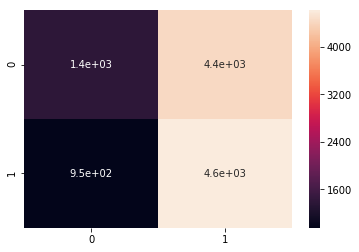

In [238]:
get_performance(X_train,Y_train)

### i) 3 hidden layer

In [300]:
#hyperparameters
epoch = 10
learning_rate = 0.01

In [301]:
%%capture
weight_layers,bias_layers = init_weights(3,[100,50,50])
hidden_layer_activation = relu
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)

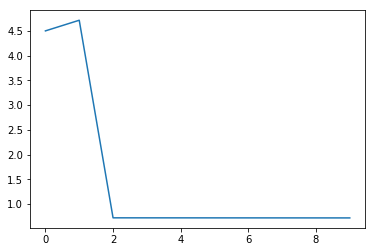

In [302]:
plt.plot(range(len(cost)),cost)

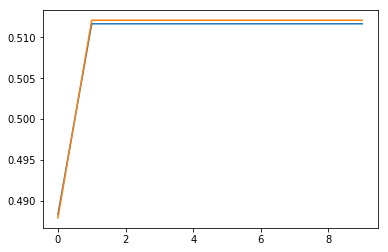

In [303]:
plt.plot(range(len(acc_train)),acc_train)
plt.plot(range(len(acc_test)),acc_test)

Accuracy score = 0.512101017186952
[[1460    0]
 [1391    0]]


(0.512101017186952, array([[1460,    0],
        [1391,    0]]))

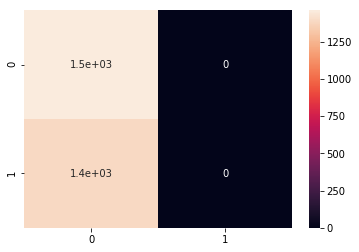

In [304]:
get_performance(X_test,Y_test)

Accuracy score = 0.5116666666666667
[[5833    0]
 [5567    0]]


(0.5116666666666667, array([[5833,    0],
        [5567,    0]]))

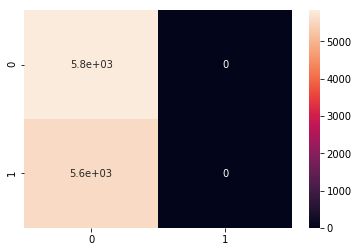

In [305]:
get_performance(X_train,Y_train)

## Part 1 (i)(d)

In [329]:
data = h5py.File('data/Q1/MNIST_Subset.h5','r+')
X=data['X'][:]
Y=data['Y'][:]

In [330]:
X = X.reshape(X.shape[0],-1)

In [331]:
X=X/255

In [332]:
#as we only have 2 classes
Y = np.where(Y==7,0,1)

In [333]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

### i) 1 hidden layer

In [337]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100,))

In [338]:
clf.fit(X_train,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [339]:
pred = clf.predict(X_test)

In [340]:
accuracy_score(Y_test,pred)

0.9898281304805332

### ii) 3 hidden layer

In [341]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100,50,50,))

In [342]:
clf.fit(X_train,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [343]:
pred = clf.predict(X_test)

In [344]:
accuracy_score(Y_test,pred)

0.9898281304805332

Accuracy is a lot better in this case compared to my model. Learning is actually happening in this case. Reasons in this case would be several, sklearn uses things like regularization, momentum and maybe a sigmoid for binary problems.